In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import string
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import datetime
import time
import seaborn as sns
import psutil
import cv2

from sklearn.model_selection import train_test_split

from collections import Counter

import sys

assert sys.version_info >= (3, 7)

In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [ ]:
import tensorflow as tf
import pandas as pd
# To prevent "CUDNN_STATUS_ALLOC_FAILED" error with GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)        

1 Physical GPUs, 1 Logical GPUs


In [ ]:
train_byclass = pd.read_csv('emnist-byclass-train.csv', header=None)
test_byclass = pd.read_csv('emnist-byclass-test.csv', header=None)

In [ ]:
s_alph=list(string.ascii_lowercase)
l_alph=list(string.ascii_uppercase)
number = [str(i) for i in range(10)]
byclass_classes=np.transpose(number+l_alph+s_alph)
print(byclass_classes) 

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [ ]:
 # data label 나누기
X_train = train_byclass.iloc[:, 1:].to_numpy()
train_labels = np.transpose(byclass_classes[train_byclass.iloc[:,0].tolist()])
X_test = test_byclass.iloc[:, 1:].to_numpy()
test_labels = np.transpose(byclass_classes[test_byclass.iloc[:,0].tolist()])

In [ ]:
#one-hot coding
y_train = pd.get_dummies(train_labels).to_numpy()
y_val = pd.get_dummies(train_labels).to_numpy()
y_test = pd.get_dummies(test_labels).to_numpy()

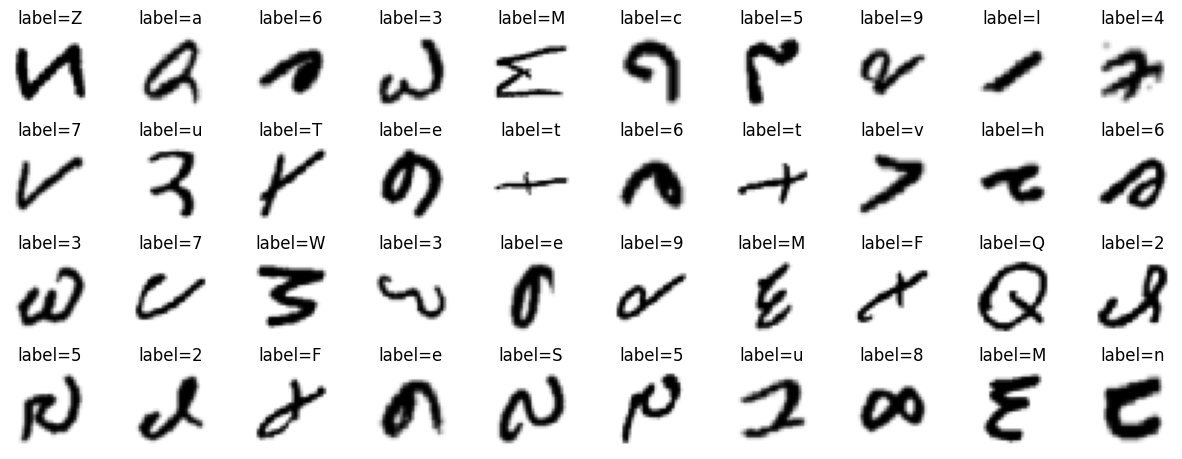

In [ ]:
plt.figure(figsize=(15,6))
for i in range(40):  
    plt.subplot(4, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.title(f'label={train_labels[i]}', y=1)
    plt.axis('off')
plt.subplots_adjust(wspace=0.5, hspace=-0.1)
plt.show()

In [ ]:
#train val test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [ ]:
from tensorflow.keras.utils import to_categorical
X_train= X_train.reshape(-1, 28, 28, 1).astype(float)
X_val= X_val.reshape(-1, 28, 28, 1).astype(float)
X_test= X_test.reshape(-1, 28, 28, 1).astype(float)

X_train = X_train.astype('float32') / 255
X_val = X_val.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
del train_byclass, test_byclass, byclass_classes, train_labels, test_labels

In [ ]:
X_train.shape


(558345, 28, 28, 1)

**mobilenet pretrained

In [ ]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils



from skimage.transform import resize

from skimage.transform import resize
# 32,32,3으로 shape 바꾸기위한 코드로 초기값은 0으로 채워집니다.
X_train_resized = np.zeros((X_train.shape[0], 32, 32, 3), dtype=np.float32)
X_test_resized = np.zeros((X_test.shape[0], 32, 32, 3), dtype=np.float32)
X_val_resized = np.zeros((X_val.shape[0], 32, 32, 3), dtype=np.float32)

#resize 함수를 사용하여 이미지를 크기 32x32로 조정, antialiasing으로 부드럽게 조정
#3개의 채널에 대해 resize 반복
for i in range(X_train_resized.shape[0]):
    resized_image = resize(X_train[i], (32, 32), anti_aliasing=True)
    X_train_resized[i] = np.repeat(resized_image, 1, axis=-1)

for i in range(X_test_resized.shape[0]):
    resized_image = resize(X_test[i], (32, 32), anti_aliasing=True)
    X_test_resized[i] = np.repeat(resized_image, 1, axis=-1)

for i in range(X_val_resized.shape[0]):
    resized_image = resize(X_val[i], (32, 32), anti_aliasing=True)
    X_val_resized[i] = np.repeat(resized_image, 1, axis=-1)


In [ ]:
X_val_resized.shape 

(139587, 32, 32, 3)

In [ ]:
y_train.shape


(558345, 62)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

import tensorflow as tf
from tensorflow import keras

base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(32, 32, 3),weights="imagenet", include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

output = tf.keras.layers.Dense(62, activation="softmax")(avg) # 클래스 수에 따라 수정



optimizer = keras.optimizers.legacy.SGD(learning_rate=0.01, momentum=0.9,
                                 nesterov=True, decay=0.001)


model_MobileNetV2 = Model(inputs=base_model.input, outputs=output)
# 모델 컴파일
model_MobileNetV2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

from tensorflow import keras
start = time.time()
# Compile, train and evaluate
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

history = model_MobileNetV2.fit(X_train_resized, y_train_one_hot ,epochs=100,batch_size=64, verbose=1, validation_data=(X_val_resized,y_val_one_hot), callbacks = [early_stopping_cb])
MobileNet_train_time = time.time()-start

print("training time : ", time.time()-start, "s")

In [ ]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

model_MobileNetV2.summary()


ES = EarlyStopping(monitor='val_loss', patience=5)
CB = keras.callbacks.ModelCheckpoint('model_MobileNetV2.h5', save_best_only=True)
RLP = ReduceLROnPlateau(monitor='val_loss', patience=4, min_lr=1e-4)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 16, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 16, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 16, 32)   0           ['bn_Conv1[0][0]']               
                                                                                              

In [ ]:
model_MobileNetV2

In [ ]:
for indices in zip(range(33), range(33, 66), range(66, 99), range(99, 132),range(132,154)):
    for idx in indices:
        print(f"{idx:3}: {base_model.layers[idx].name:22}", end="")
    print()

  0: input_1                33: block_3_depthwise_relu 66: block_7_depthwise      99: block_11_expand_BN    132: block_14_project_BN   
  1: Conv1                  34: block_3_project        67: block_7_depthwise_BN  100: block_11_expand_relu  133: block_14_add          
  2: bn_Conv1               35: block_3_project_BN     68: block_7_depthwise_relu101: block_11_depthwise    134: block_15_expand       
  3: Conv1_relu             36: block_4_expand         69: block_7_project       102: block_11_depthwise_BN 135: block_15_expand_BN    
  4: expanded_conv_depthwise 37: block_4_expand_BN      70: block_7_project_BN    103: block_11_depthwise_relu136: block_15_expand_relu  
  5: expanded_conv_depthwise_BN 38: block_4_expand_relu    71: block_7_add           104: block_11_project      137: block_15_depthwise    
  6: expanded_conv_depthwise_relu 39: block_4_depthwise      72: block_8_expand        105: block_11_project_BN   138: block_15_depthwise_BN 
  7: expanded_conv_project  40: bloc

In [ ]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [ ]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

In [ ]:
for layer in model_MobileNetV2.layers:
    layer.trainable = True

In [ ]:
n_epochs = 100
#batch_size=62
#onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)

history=model_MobileNetV2.fit(X_train_resized,y_train,epochs=n_epochs, batch_size=128,verbose=1, validation_data=(X_val_resized,y_val),callbacks=[ES,CB,lr_scheduler])

Epoch 1/100
4363/4363 [==============================] - 85s 19ms/step - loss: 0.5176 - accuracy: 0.8231 - val_loss: 0.6121 - val_accuracy: 0.8322 - lr: 0.0100
Epoch 2/100
4363/4363 [==============================] - 78s 18ms/step - loss: 0.3881 - accuracy: 0.8572 - val_loss: 0.3744 - val_accuracy: 0.8619 - lr: 0.0100
Epoch 3/100
4363/4363 [==============================] - 80s 18ms/step - loss: 0.3683 - accuracy: 0.8631 - val_loss: 0.3663 - val_accuracy: 0.8631 - lr: 0.0100
Epoch 4/100
4363/4363 [==============================] - 80s 18ms/step - loss: 0.3570 - accuracy: 0.8660 - val_loss: 0.3609 - val_accuracy: 0.8659 - lr: 0.0100
Epoch 5/100
4363/4363 [==============================] - 79s 18ms/step - loss: 0.3499 - accuracy: 0.8679 - val_loss: 0.3566 - val_accuracy: 0.8666 - lr: 0.0100
Epoch 6/100
4363/4363 [==============================] - 80s 18ms/step - loss: 0.3425 - accuracy: 0.8706 - val_loss: 0.3522 - val_accuracy: 0.8688 - lr: 0.0050
Epoch 7/100
4363/4363 [=================

In [ ]:

start = time.time()
print(model_MobileNetV2.evaluate(X_test_resized,y_test))

MobileNet_test_time = time.time()-start
print("inference time : ",  time.time()-start, "s")

3636/3636 [==============================] - 24s 6ms/step - loss: 0.3458 - accuracy: 0.8696
[0.3457629978656769, 0.8696302771568298]
inference time :  25.041829347610474 s


Text(0.5, 1.0, 'Loss Curves')

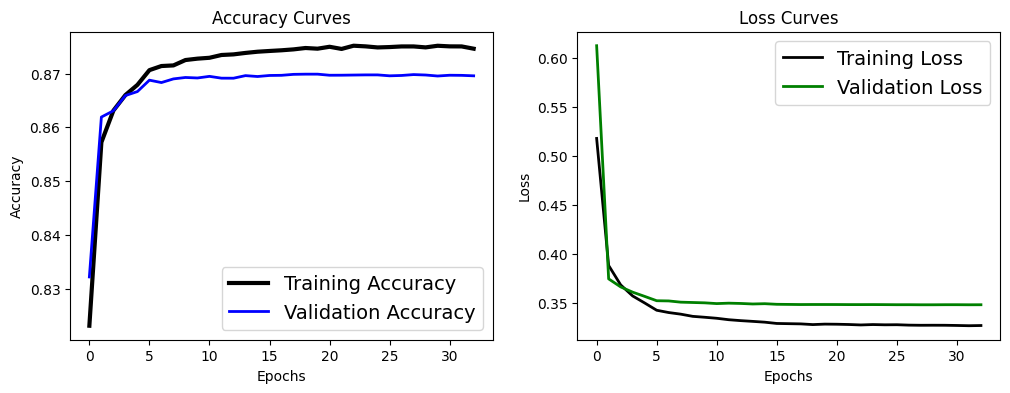

In [ ]:
# Accuracy curve
plt.figure(figsize=[12,4])
ax1 = plt.subplot(1, 2, 1)
ax1.plot(history.history['accuracy'], 'black', linewidth=3.0)
ax1.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
ax1.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

# Loss curve
ax2 = plt.subplot(1, 2, 2)
ax2.plot(history.history['loss'], 'black', linewidth=2.0)
ax2.plot(history.history['val_loss'], 'green', linewidth=2.0)
ax2.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)